# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [ ]:
## For written responses to questions, I have commented out my response.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [4]:
! git clone https://github.com/arya-rajesh-99/undergrad_ml_assignments
%run ./undergrad_ml_assignments/get_data.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fatal: destination path 'undergrad_ml_assignments' already exists and is not an empty directory.
Download complete
Extracting data files...
Data extracted


In [37]:
### 1. Taking commas out of price.
airbnb_df = pd.read_csv('./data/airbnb_NYC.csv', encoding = "latin1")
airbnb_df['Price'].unique()
airbnb_df['Price_clean']= airbnb_df['Price'].str.replace(',', '', regex= True).astype(int)
airbnb_df['Price_clean'].unique()
missing_prices = airbnb_df['Price_clean'].isna().sum()
print("Number of missing prices are " + str(missing_prices))

Number of missing prices are 0


In [38]:
### 2. minnesota police categorical var
# cleaning subject injury
police_df = pd.read_csv('./data/mn_police_use_of_force.csv')
police_df['subject_injury'].unique()

police_df['subject_injury_clean']= police_df['subject_injury'].fillna("Missing")
police_df['subject_injury_clean'].unique()

# finding proportion missing
missing_injury = police_df['subject_injury'].isna().mean()
print("Proportion of missing values are " + str(missing_injury))
## Proportion of missing values are 0.7619342359767892.

#cross tabulation
injury_force_cross = pd.crosstab(police_df['force_type'],
                                 police_df['subject_injury_clean'],
                                           dropna = False)

print(injury_force_cross)
# filled with missing earlier.
## From what I see, the data that is missing seems to be force types that
## are least likely to result in death. For example, bodily force and chemical
## irritant have a high number of missing values.


Proportion of missing values are 0.7619342359767892
subject_injury_clean         Missing    No   Yes
force_type                                      
Baton                              2     0     2
Bodily Force                    7051  1093  1286
Chemical Irritant               1421   131    41
Firearm                            0     2     0
Gun Point Display                 27    33    44
Improvised Weapon                 74    34    40
Less Lethal                       87     0     0
Less Lethal Projectile             0     1     2
Maximal Restraint Technique      170     0     0
Police K9 Bite                    31     2    44
Taser                            985   150   172


In [44]:
### 3. dummy variable
metabric_df = pd.read_csv('./data/metabric.csv')
metabric_df['Overall Survival Status'].unique()
metabric_df['Overall Survival Status Binary'] = metabric_df['Overall Survival Status'].str[0].astype(int)
metabric_df['Overall Survival Status Binary'].unique()

array([0, 1])

In [39]:
### 4. missing values of review scores rating
missing_reviews = airbnb_df['Review Scores Rating'].isna().sum()
print("Number of missing reviews are " + str(missing_reviews))
# median
median_missing = airbnb_df['Review Scores Rating'].median()
airbnb_df['Review Scores Rating Median'] = airbnb_df['Review Scores Rating'].fillna(median_missing)
# This may bias results because the median does not account for variablity
# in the data for which the missing values may have been.

Number of missing reviews are 8323


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [86]:
import matplotlib.pyplot as plt
### 1. opening the file
# it's a xlsx so will have to read as excel and upload into colab

shark_attacks_df = pd.read_excel("./GSAF5.xls")
shark_attacks_df.head()

### 2. drop columns
shark_attacks_df = shark_attacks_df.dropna(axis=1, how='all')

### 3. observation
shark_attacks_df.head()
shark_attacks_df['Location'].unique()

# From a general scan of the data, I see that the locations of the attacks are
# in common diving areas/bodies ofw water but the locations vary geographically
# across many countries and coasts. When cleaning and analyzing the data
# because this variable has inconsistent formatting so we know we have to clean
# this in depth. Additionally, grouping the locations may be difficult as it
# seems that the locations vary signficantly.

array(['Del Chifre Beach in Olinda', 'Angels Beach East Ballina',
       'Cooee Beach west of Burnie', ..., 'Ocracoke Inlet',
       'Panama Bay 8ºN, 79ºW', 'Below the English fort, Trincomalee'],
      dtype=object)

[2026. 2016. 2025. 2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

/tmp/ipython-input-2534113332.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_recent['Year_clean'] = shark_attacks_recent['Year_clean'].astype(int)
/tmp/ipython-input-2534113332.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


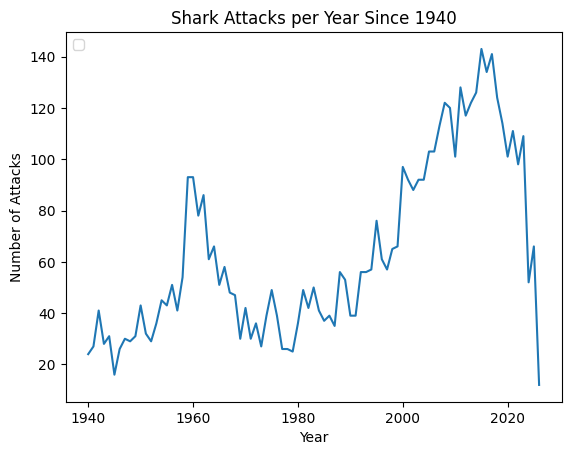

In [85]:
### 4. year var
shark_attacks_df['Year'].unique()
shark_attacks_df['Year_clean'] = pd.to_numeric(shark_attacks_df['Year'], errors='coerce')
print(shark_attacks_df['Year_clean'].unique())
shark_attacks_recent = shark_attacks_df[shark_attacks_df['Year_clean']>=1940]
shark_attacks_recent['Year_clean'] = shark_attacks_recent['Year_clean'].astype(int)
print(shark_attacks_recent['Year_clean'].unique())
shark_attacks_recent['Year_clean'].value_counts()

attacks_per_year = shark_attacks_recent['Year_clean'].value_counts().sort_index()
x = attacks_per_year.index
y = attacks_per_year.values

plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Shark Attacks per Year Since 1940')
plt.legend(loc='upper left')
plt.show()

# The attacks have a trend of increasing over time as shown in the line plot.

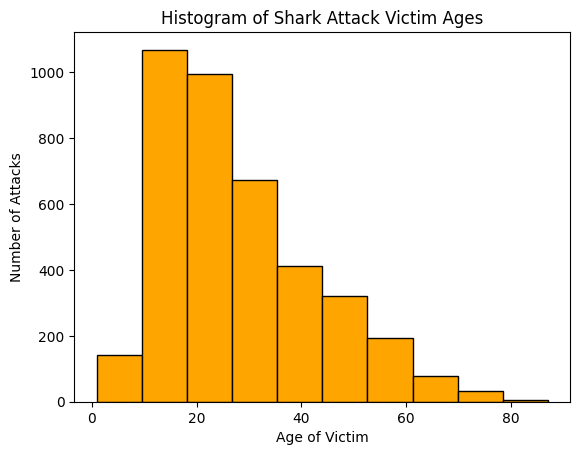

Proportion of unprovoked attacks:0.7387616624257846


array(['Y', 'N', 'Unknown'], dtype=object)

In [84]:
### 5. cleaning age var
shark_attacks_df['Age'].unique()
shark_attacks_df['Age_clean'] = pd.to_numeric(shark_attacks_df['Age'], errors='coerce')

x = shark_attacks_df['Age_clean']
plt.hist(x, bins=10, color='orange', edgecolor='black')
plt.xlabel('Age of Victim')
plt.ylabel('Number of Attacks')
plt.title('Histogram of Shark Attack Victim Ages')
plt.show()

### 6. cleaning type var
shark_attacks_df['Type'].unique()
shark_attacks_df.loc[shark_attacks_df['Type'].str.contains('Provoked', case=False, na=False), 'Type_clean'] = 'Provoked'
shark_attacks_df.loc[shark_attacks_df['Type'].str.contains('Unprovoked', case=False, na=False), 'Type_clean'] = 'Unprovoked'
shark_attacks_df['Type_clean'] = shark_attacks_df['Type_clean'].fillna('Unknown')
shark_attacks_df['Type_clean'].unique()
proportion_unprovoked = (shark_attacks_df['Type_clean'] == 'Unprovoked').mean()
print("Proportion of unprovoked attacks:" + str(proportion_unprovoked))

# Proportion of unprovoked attacks:0.7387616624257846

### 7. cleaning fatal y/n var
shark_attacks_df['Fatal_clean'] = shark_attacks_df['Fatal Y/N']
shark_attacks_df.loc[shark_attacks_df['Fatal_clean'].str.contains('Y', case=False, na=False), 'Fatal_clean'] = 'Y'
shark_attacks_df.loc[shark_attacks_df['Fatal_clean'].str.contains('N', case=False, na=False), 'Fatal_clean'] = 'N'
# following line suggested by ChatGPT(Couldn't figure out how to clean other outputs other than na)
shark_attacks_df.loc[shark_attacks_df['Fatal_clean'].isin(['Y', 'N']) == False, 'Fatal_clean'] = 'Unknown'
shark_attacks_df['Fatal_clean'].unique()

### 8. Unprovoked are more likely to be fatal as shown in the proportion of unprovoked attacks
# output for percentage. I think this is very interesting, and is likely because
# the person who is going into unprovoked area are likely not prepared to go into
# the water and unaware of that risk.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?